In [9]:
import os
import sys

# Set path of python project
path="/home/aferral/PycharmProjects/generative_supervised_data_augmentation"
os.chdir(path)
print(os.getcwd())
print(os.listdir('./'))

/home/aferral/PycharmProjects/generative_supervised_data_augmentation
['requirements.txt', 'classification_models.py', 't.py', 'model', 'utils.py', 'venv', '.idea', 'test.html', 'jupyter_notebooks', '__pycache__', '.ipynb_checkpoints']


INFO:tensorflow:Restoring parameters from ./model/check
conv_acts.shape: (2, 2, 50)
softmax_w.shape: (50, 10)
pred.shape: (1, 10)
Prediciont [7.51911628e-07 9.99082641e-01 1.35972044e-05 5.41264308e-08
 6.80869579e-06 6.33817588e-09 1.04865195e-08 2.51884169e-08
 8.95351887e-04 7.52661704e-07]
Predicted 1
(10, 2, 2)
CMAP: 


/home/aferral/PycharmProjects/generative_supervised_data_augmentation/venv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


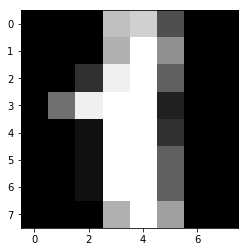

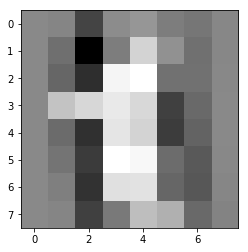

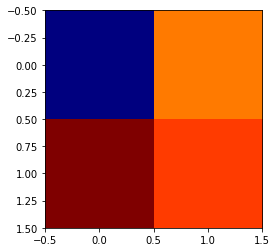

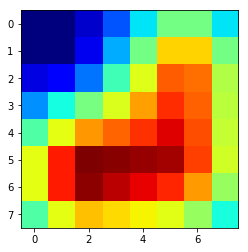

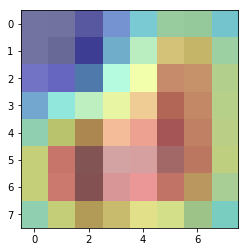

In [12]:
from classification_models import clasification_model
from sklearn.datasets import load_digits
import numpy as np

train=False

with clasification_model() as model:


    if train:
        model.train()
    else:
        model.load('./model/check.meta','./model')


        digits = load_digits(return_X_y=True)
        test_image = (digits[0][1]).reshape(1,64)


        image_processed, prediction, cmaps = model.visualize(test_image)

        test_image_plot = image_processed.reshape((8, 8))


        p_class = np.argmax(prediction)
        print("Predicted {0}".format(p_class))
        print(cmaps.shape)
        print("CMAP: ")

        import matplotlib.pyplot as plt
        from skimage.transform import resize

        plt.figure()
        plt.imshow(test_image.reshape(8,8),cmap='gray')

        plt.figure()
        plt.imshow(test_image_plot,cmap='gray')


        plt.figure()
        plt.imshow(cmaps[0],cmap='jet',interpolation='none')


        resized_map = resize(cmaps[0],(test_image_plot.shape))
        plt.figure()
        plt.imshow(resized_map,cmap='jet')

        fig, ax = plt.subplots()
        ax.imshow(resized_map, cmap='jet',alpha=0.6)
        ax.imshow(test_image_plot,alpha=0.4,cmap='gray')
        plt.show()


In [ ]:
"""
Ex1
TODO experimentar robustes de visualizacion

-Binarizar mascara con otsu??? 90 percentil???
-Aplicar ruido con sigma creciente 100 samples y observar distribucion label
-Crear animacion de variacion 

Hipotesis: Deberia oscilar rapidamente la clase observada

Ex2: Mantener solo el 50 % percentil de la imagen
-Binarizar y variar de 


"""

